In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('seaborn')

### Import Data

In [3]:
df = pd.read_excel('drive/My Drive/Datasets/Order Dataset/NewOrders.xlsx')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,Ruben Dartt,Alberta,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
2,3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,5.81,Liz Pelletier,Alberta,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
3,4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,Liz Pelletier,Alberta,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
4,5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,Liz Pelletier,Alberta,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


In [5]:
df.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

In [6]:
df['Product Base Margin'] = df['Product Base Margin'].fillna(df['Product Base Margin'].mean())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

### Data Visualization

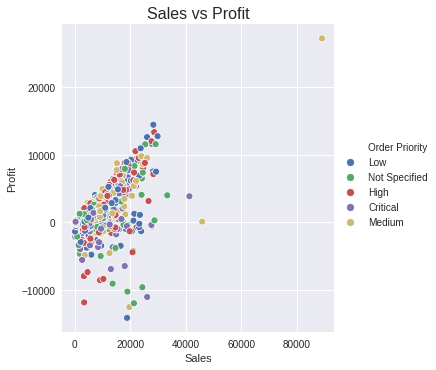

In [8]:
sns.relplot('Sales','Profit',data=df,hue='Order Priority')
plt.title('Sales vs Profit',fontsize=16)
plt.show()

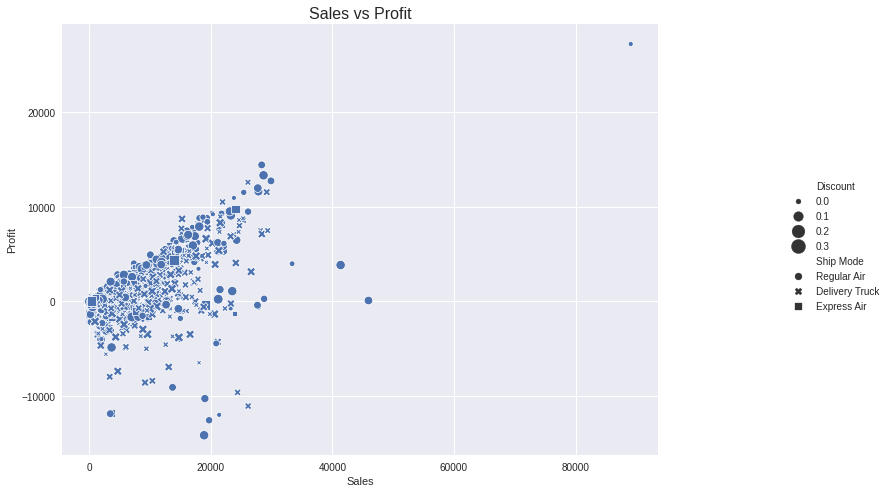

In [9]:

s = sns.relplot('Sales','Profit',data=df,style='Ship Mode',size='Discount',sizes=(25,200))
s.fig.set_size_inches(14, 7)
plt.title('Sales vs Profit',fontsize=16)
plt.show()

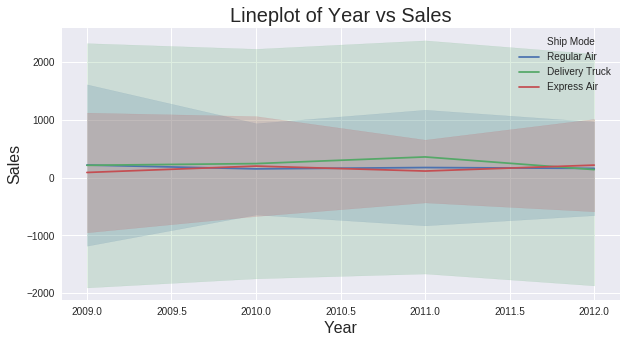

In [41]:
## Line Plot

df['Year'] = df['Order Date'].dt.year

plt.rcParams['figure.figsize'] = (10,5)

sns.lineplot('Year','Profit',data=df,ci='sd',hue='Ship Mode')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Sales',fontsize=16)
plt.title('Lineplot of Year vs Sales',fontsize=20)
plt.show()

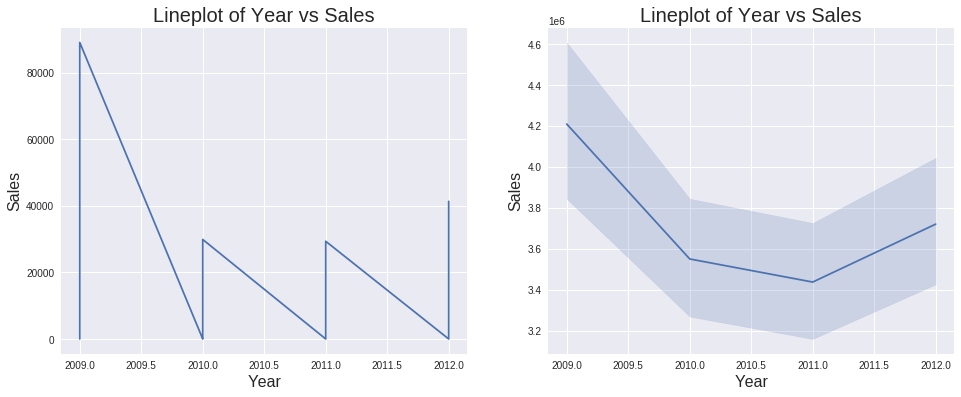

In [40]:
fig, ax = plt.subplots(1, 2,figsize=(16,6))
fig.subplots_adjust(wspace=0.2)

estimator = [None,sum]

for i in range(2):
  s = sns.lineplot('Year','Sales',data=df,estimator=estimator[i],ax=ax[i])
  s.set_xlabel('Year',fontsize=16)
  s.set_ylabel('Sales',fontsize=16)
  s.set_title('Lineplot of Year vs Sales',fontsize=20)

In [12]:
def change(x):
  if x>0.04:
    x = 0.05
  return x

df['Discount New'] = df['Discount'].apply(lambda x: change(x))

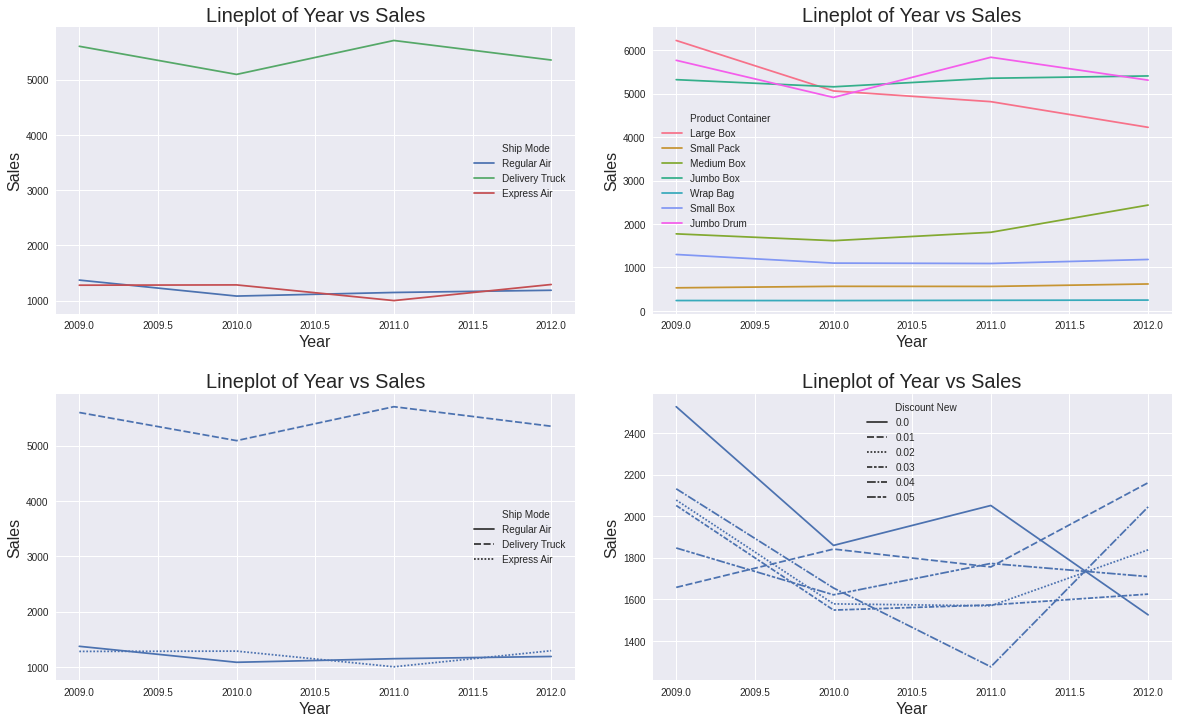

In [13]:
fig, ax = plt.subplots(2, 2,figsize=(20,12))
fig.subplots_adjust(wspace=0.15,hspace=0.28)

hue=['Ship Mode','Product Container']
style=['Ship Mode','Discount New']

for i in range(2):
  if i==0:
    for j in range(2):
      s = sns.lineplot('Year','Sales',data=df,hue=hue[j],ax=ax[i][j],ci=None)
      s.set_xlabel('Year',fontsize=16)
      s.set_ylabel('Sales',fontsize=16)
      s.set_title('Lineplot of Year vs Sales',fontsize=20)
  else:
    for j in range(2):
      s = sns.lineplot('Year','Sales',data=df,ax=ax[i][j],style=style[j],ci=None)
      s.set_xlabel('Year',fontsize=16)
      s.set_ylabel('Sales',fontsize=16)
      s.set_title('Lineplot of Year vs Sales',fontsize=20)

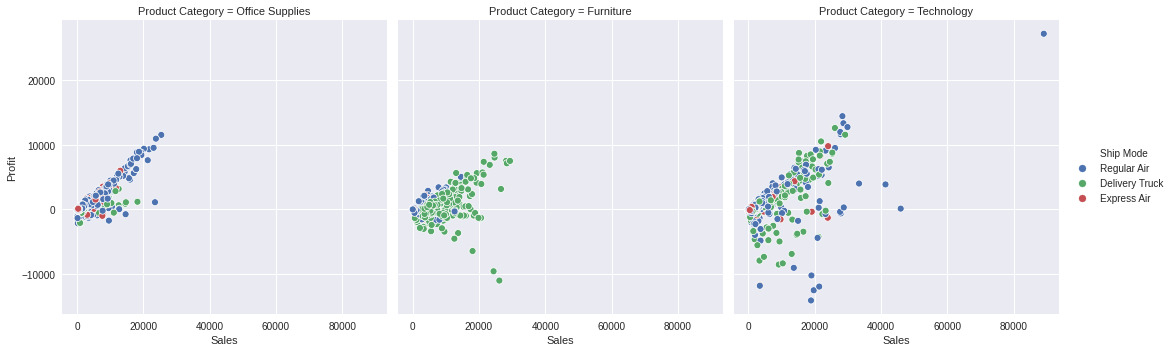

In [14]:
sns.relplot('Sales','Profit',data=df,hue='Ship Mode',ci=None,col='Product Category')
plt.show()

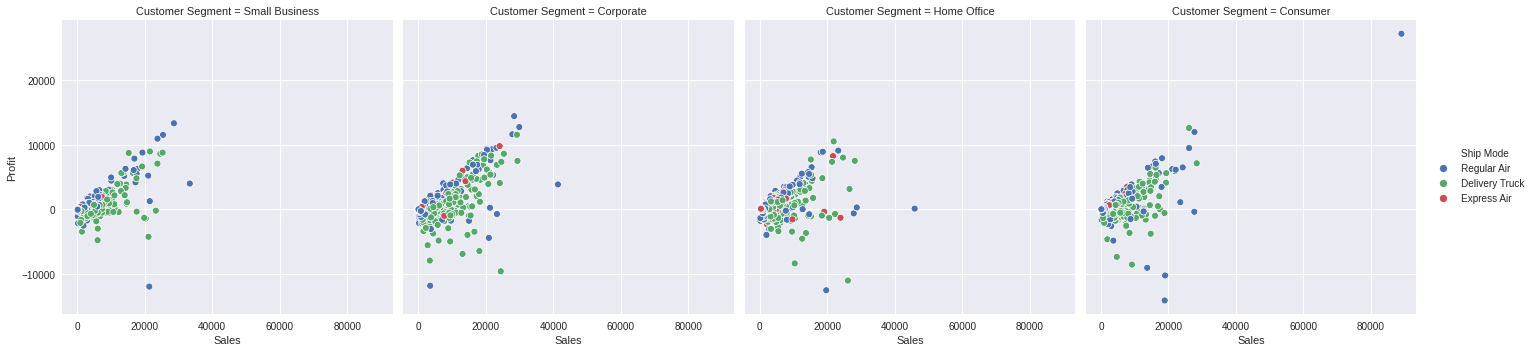

In [15]:
sns.relplot('Sales','Profit',data=df,hue='Ship Mode',ci=None,col='Customer Segment')
plt.show()

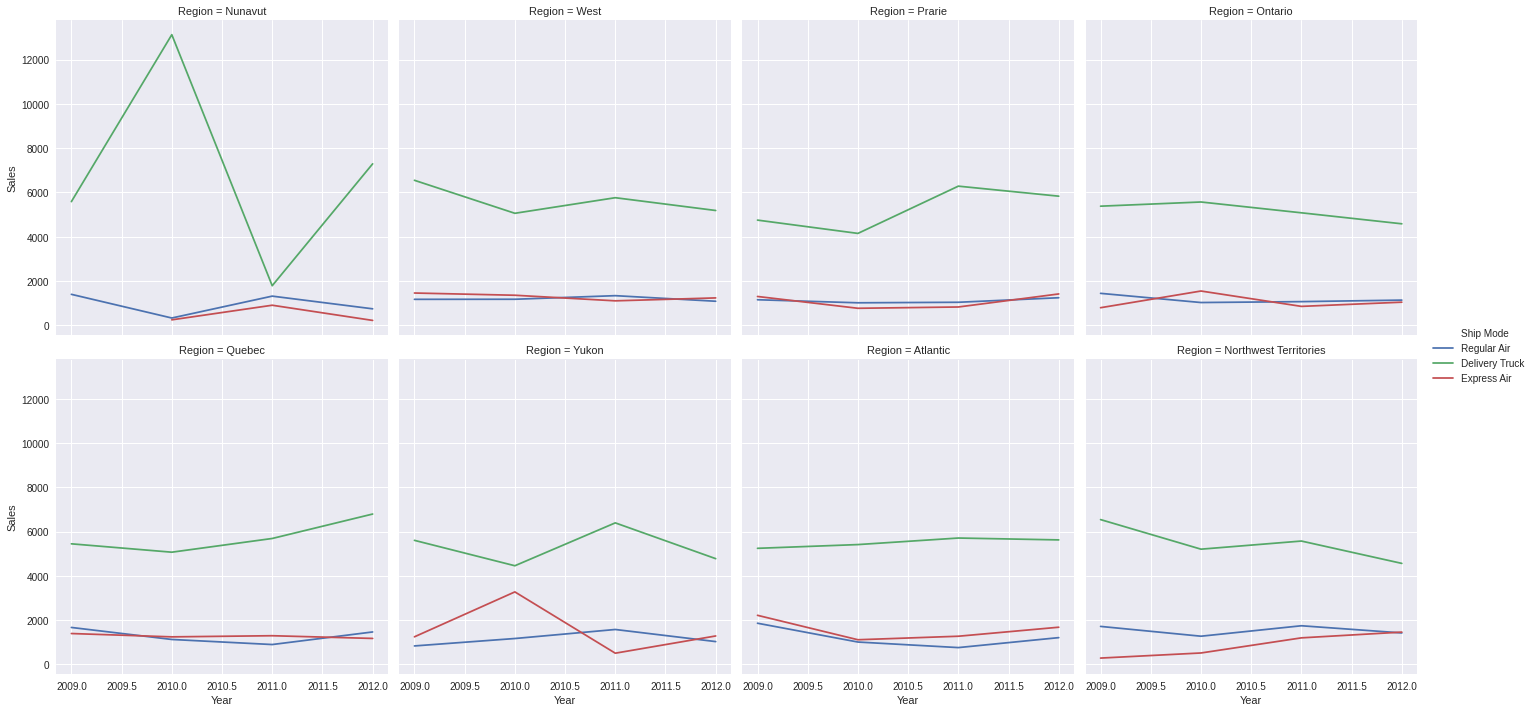

In [16]:

sns.relplot('Year','Sales',data=df,hue='Ship Mode',ci=None,col='Region',kind='line',col_wrap=4)
plt.show()

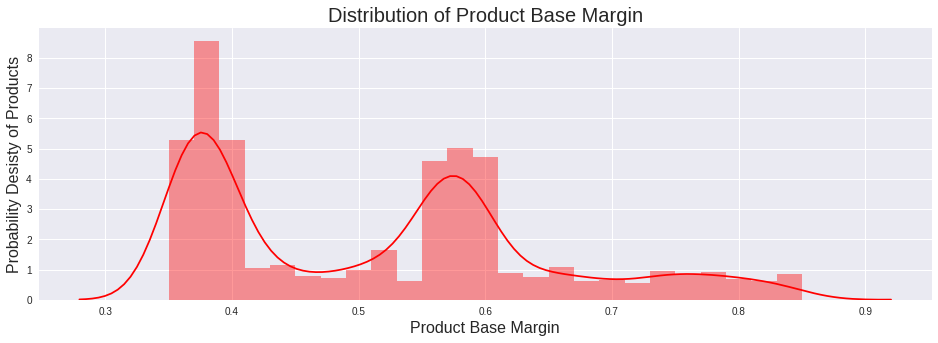

In [17]:
##Product Base Margin Distribution

plt.rcParams['figure.figsize'] = (16,5)
sns.distplot(df['Product Base Margin'],color='red')
plt.title('Distribution of Product Base Margin',fontsize=20)
plt.xlabel('Product Base Margin',fontsize=16)
plt.ylabel('Probability Desisty of Products',fontsize=16)
plt.show()

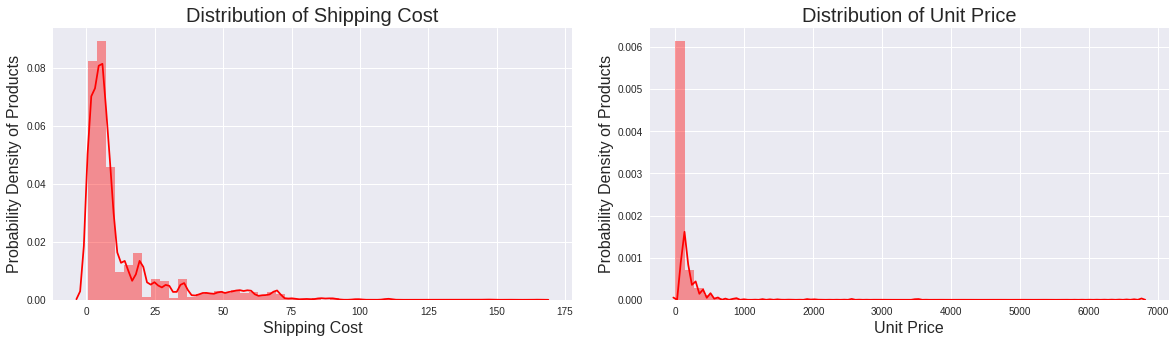

In [18]:
### Distributionof Shipping Cost & Unit Price
fig,ax = plt.subplots(1,2,figsize=(20,5))
fig.subplots_adjust(wspace=0.15)

data = ['Shipping Cost','Unit Price']

for i in range(2):
  s = sns.distplot(df[data[i]],color='red',ax=ax[i])
  s.set_title(f'Distribution of {data[i]}',fontsize=20)
  s.set_xlabel(data[i],fontsize=16)
  s.set_ylabel('Probability Density of Products',fontsize=16)

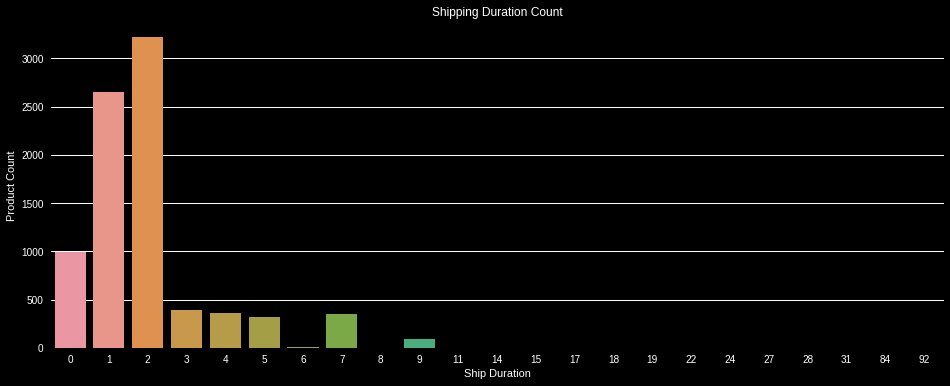

In [19]:
#shiping Duration
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (16,6)
def count(x):
  x = str(x)[0:-14]
  return int(x)

df['Ship Duration'] = df['Ship Date'].dt.date - df['Order Date'].dt.date
df['Ship Duration'] = df['Ship Duration'].apply(lambda x: count(x))

sns.countplot(df['Ship Duration'])
plt.title('Shipping Duration Count')
plt.ylabel('Product Count')
plt.show()

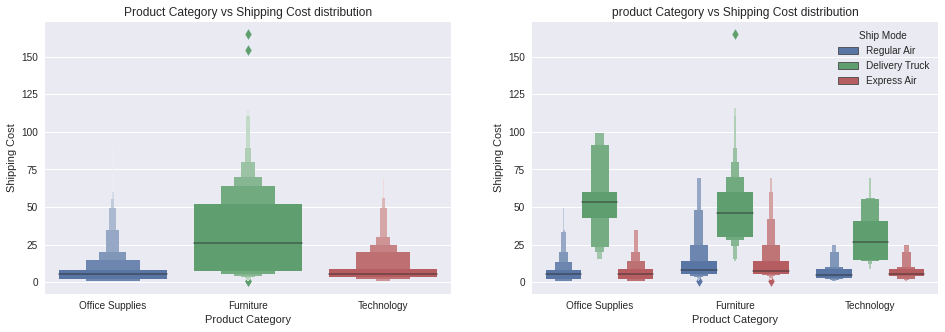

In [20]:
6# product Category vs shipping cost
plt.style.use('seaborn')
fig,ax = plt.subplots(1,2,figsize=(16,5))

s1 = sns.boxenplot('Product Category','Shipping Cost',data=df,ax=ax[0])
s1.set_title('Product Category vs Shipping Cost distribution')

s2 = sns.boxenplot('Product Category','Shipping Cost',data=df,hue='Ship Mode',ax=ax[1])
s2.set_title('product Category vs Shipping Cost distribution')

plt.show()

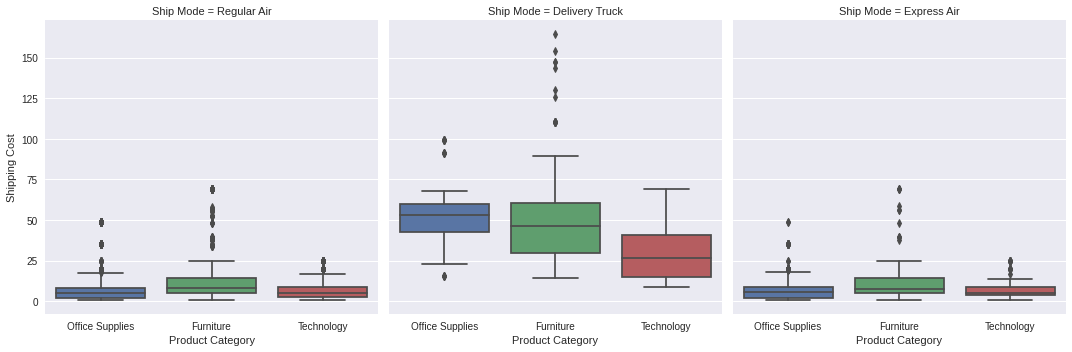

In [21]:
sns.catplot('Product Category','Shipping Cost',data=df,kind='box',col='Ship Mode')
plt.show()

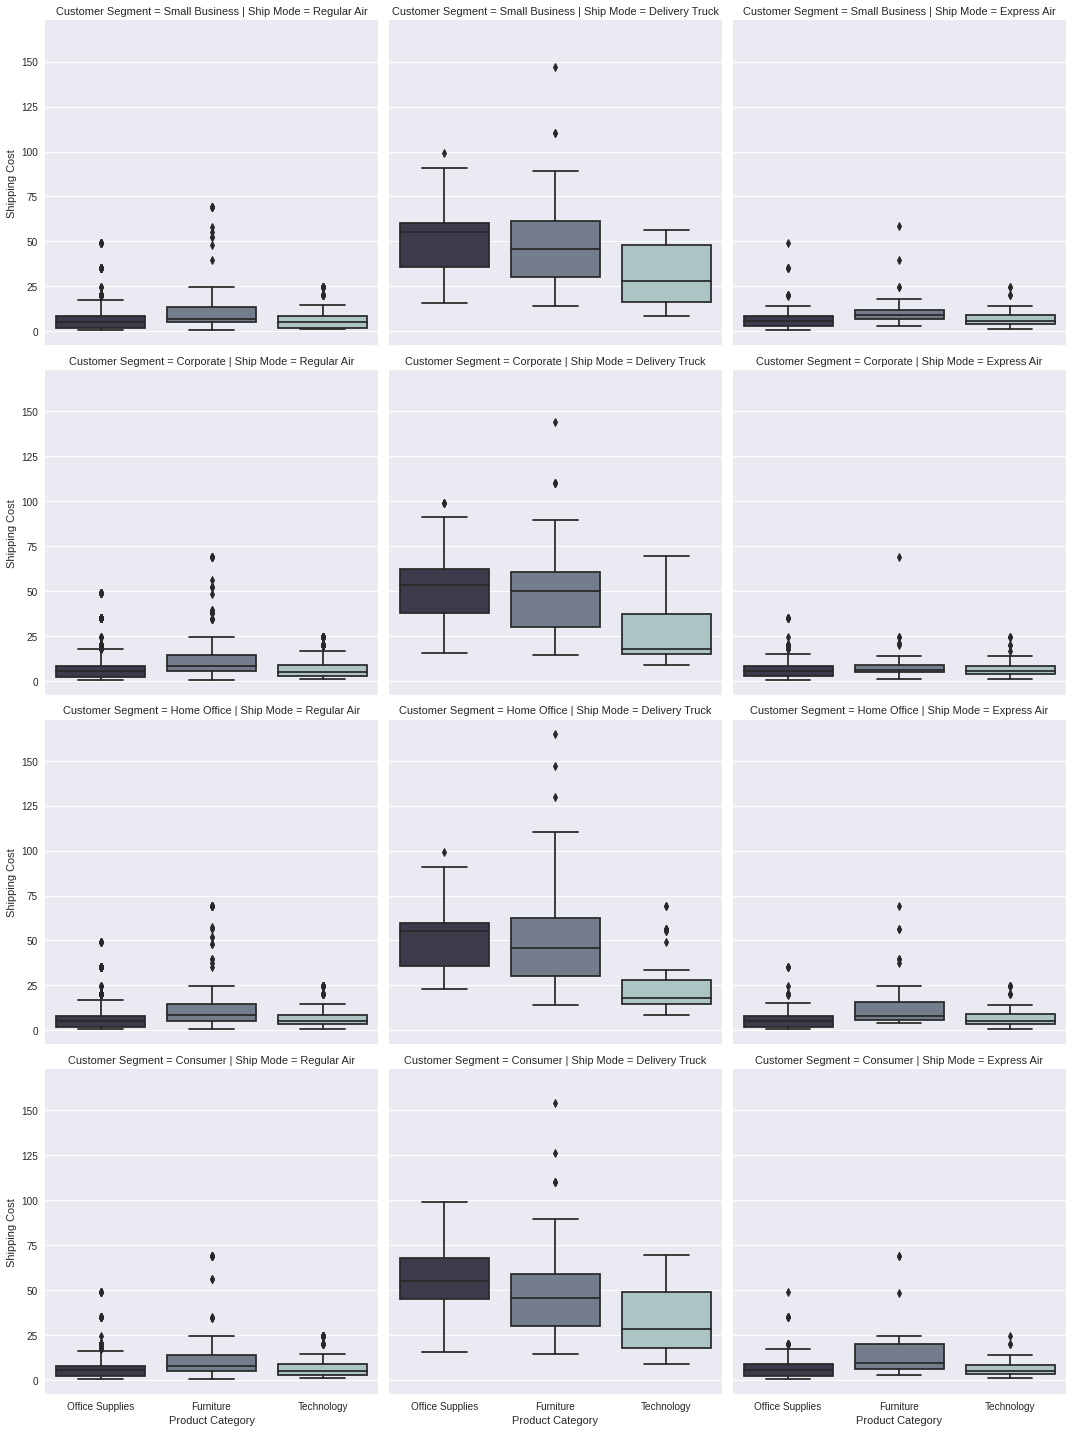

In [22]:
sns.catplot('Product Category','Shipping Cost',data=df,kind='box',col='Ship Mode',row='Customer Segment',palette = 'bone')
plt.show()

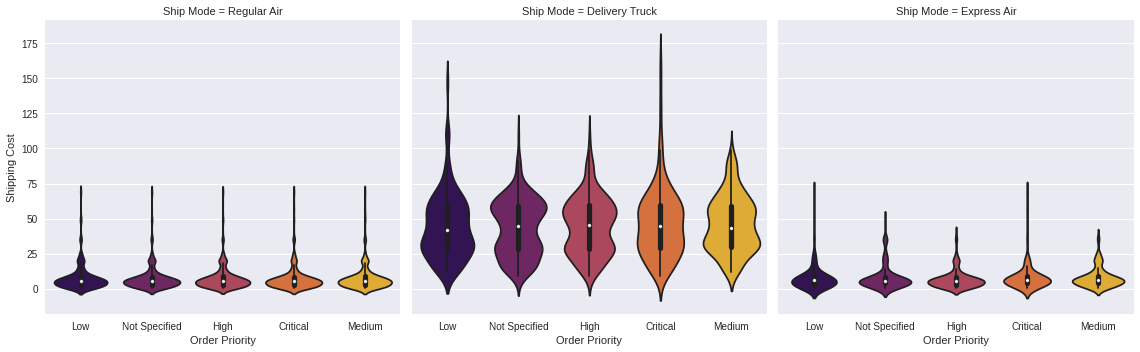

In [23]:
s = sns.catplot('Order Priority','Shipping Cost',data=df,kind='violin',palette = 'inferno',col='Ship Mode')
s.fig.set_size_inches(16,5)
plt.show()

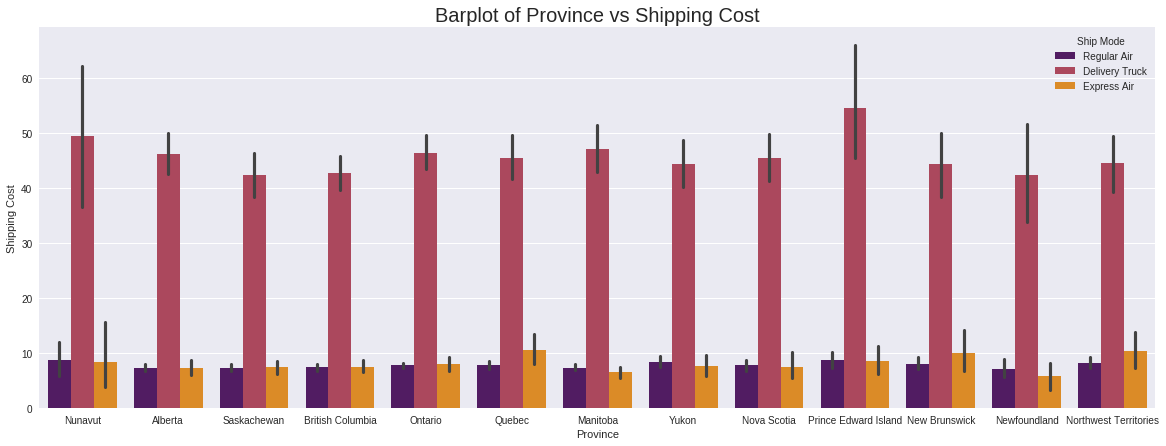

In [24]:
plt.style.use('_classic_test_patch')
plt.rcParams['figure.figsize']= (20,7)

sns.barplot('Province','Shipping Cost',data=df,palette = 'inferno',hue='Ship Mode')
plt.title('Barplot of Province vs Shipping Cost',fontsize=20)
plt.show()

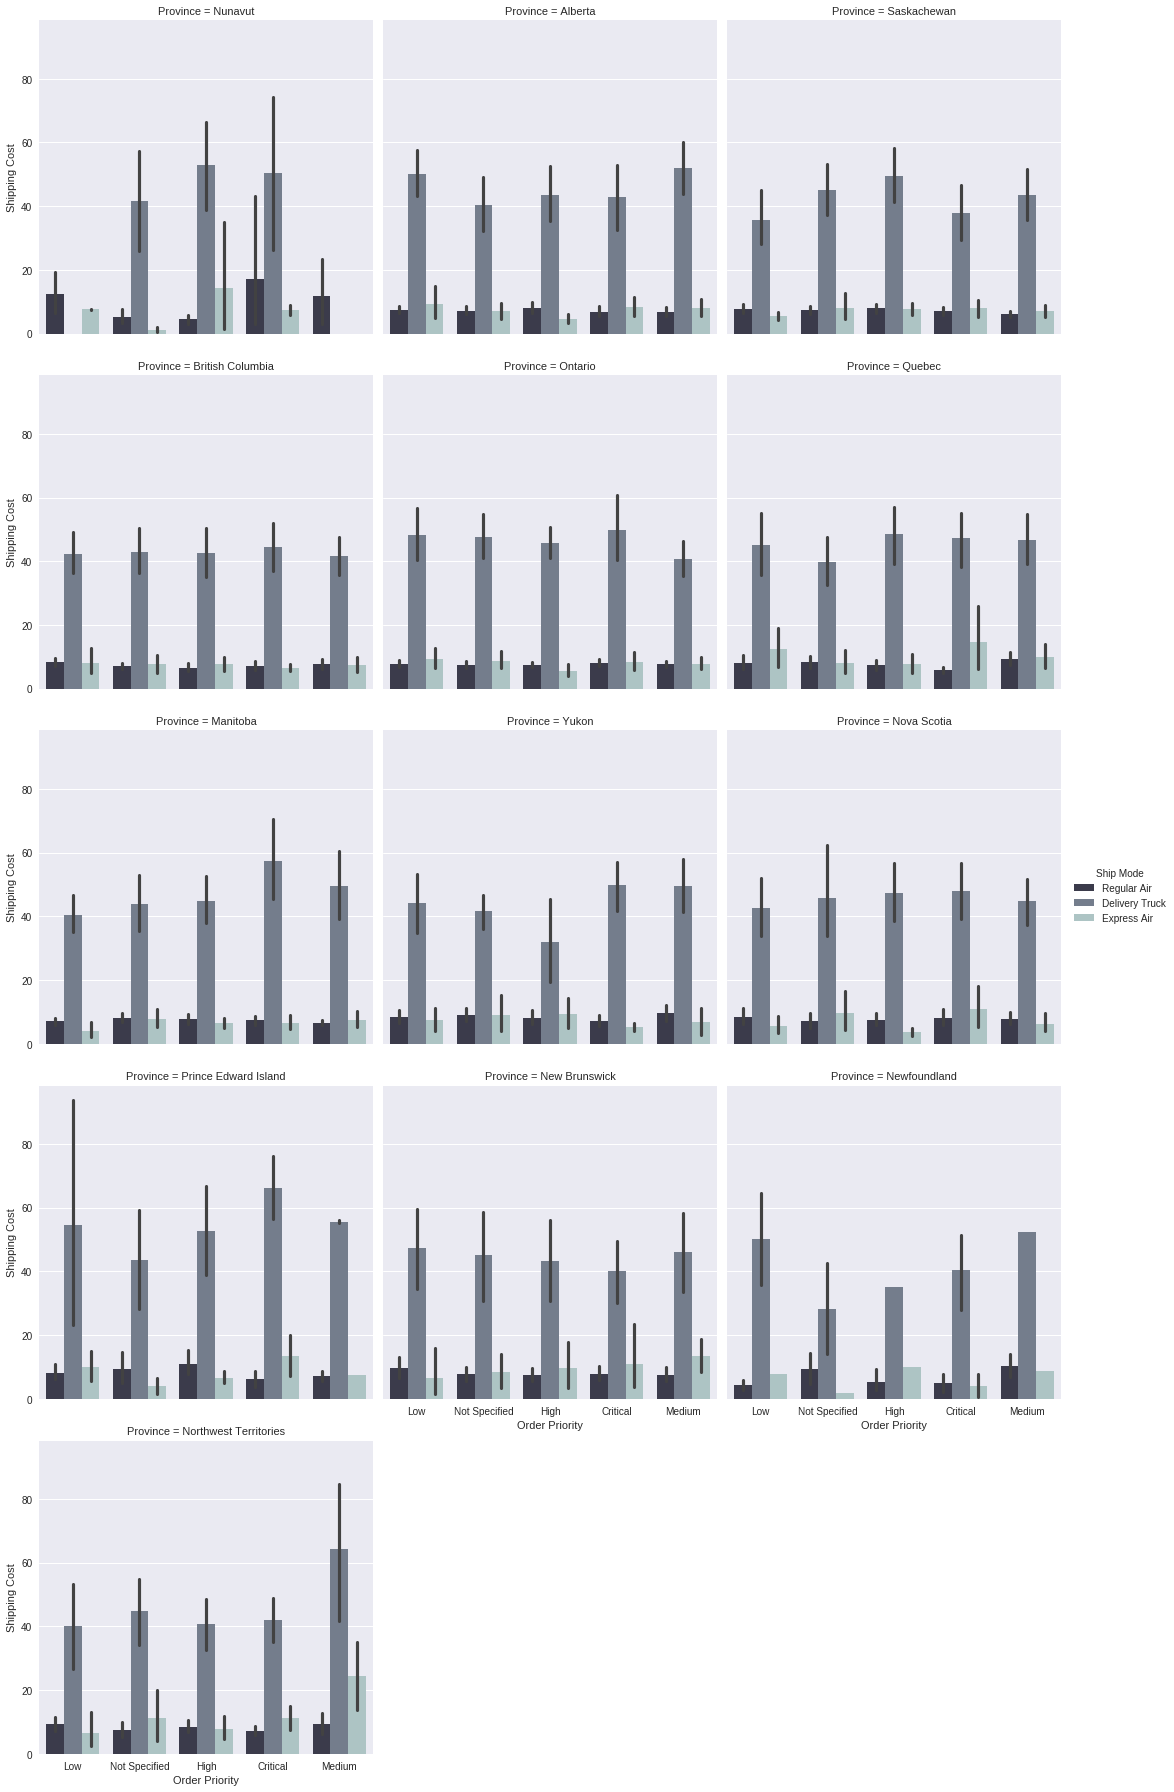

In [25]:
plt.style.use('seaborn')

s = sns.catplot('Order Priority','Shipping Cost',data=df,palette = 'bone',col='Province',kind='bar',col_wrap=3,hue='Ship Mode')
plt.show()

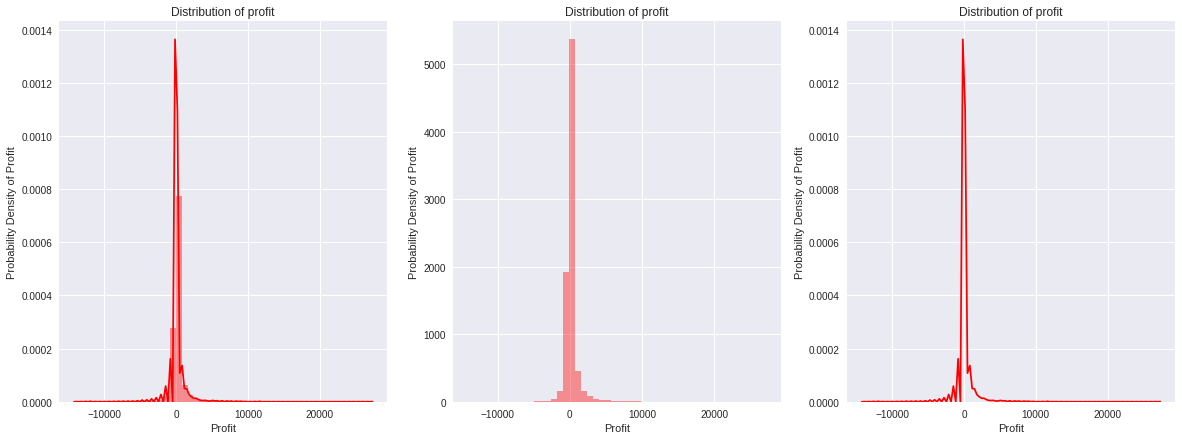

In [26]:
fig,ax = plt.subplots(1,3,figsize=(20,7))

s = sns.distplot(df.Profit,color='red',ax=ax[0])
s.set_title('Distribution of profit')
s.set_ylabel('Probability Density of Profit')

s = sns.distplot(df.Profit,color='red',ax=ax[1],kde=False)
s.set_title('Distribution of profit')
s.set_ylabel('Probability Density of Profit')

s = sns.distplot(df.Profit,color='red',ax=ax[2],hist=False)
s.set_title('Distribution of profit')
s.set_ylabel('Probability Density of Profit')

plt.show()

In [27]:
import math

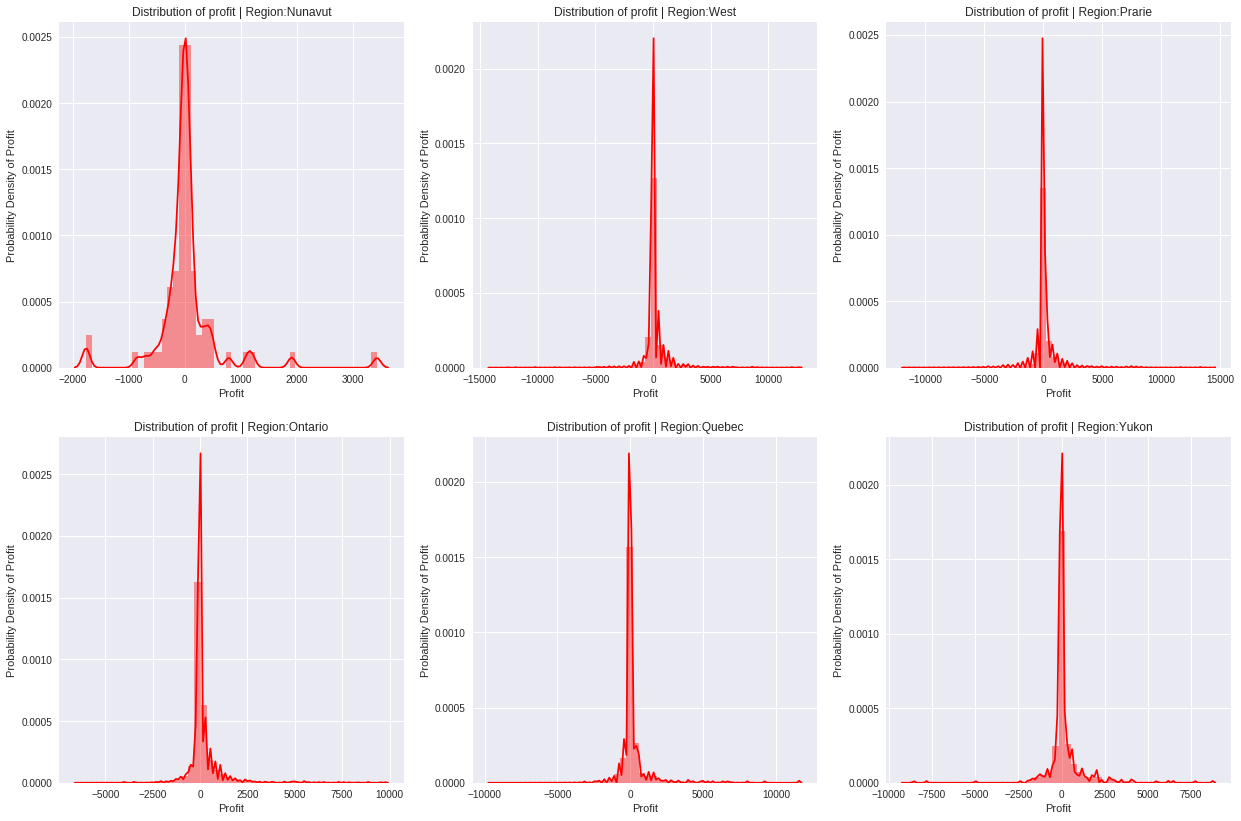

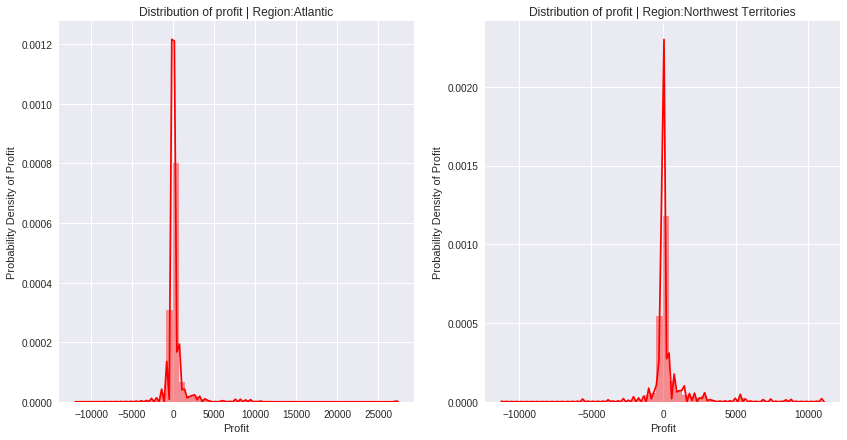

In [28]:
x = list(df.Region.unique())
fig1,ax1 = plt.subplots(math.floor(len(x)/3),3,figsize=(21,14))
fig2,ax2 = plt.subplots(1,len(x)%3,figsize=(14,7))

a = ax1.shape[0]
b = ax1.shape[1]
for i in range(a):
  for j in range(b):
    s = sns.distplot(df.Profit[df.Region == x[i*b+j]],color='red',ax=ax1[i][j])
    s.set_title(f'Distribution of profit | Region:{x[i*b+j]}')
    s.set_ylabel('Probability Density of Profit')

for i in range(ax2.shape[0]):
  s = sns.distplot(df.Profit[df.Region == x[a*b+i]],color='red',ax=ax2[i])
  s.set_title(f'Distribution of profit | Region:{x[a*b+i]}')
  s.set_ylabel('Probability Density of Profit')

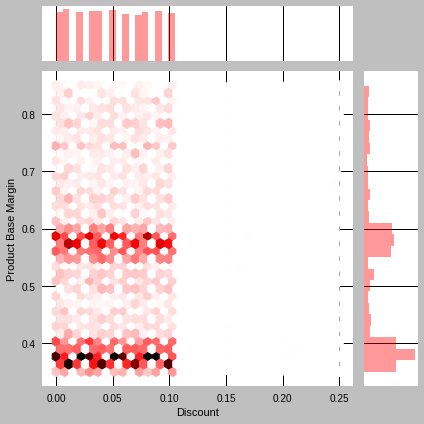

In [29]:
# Joinplot between Discount vs Product Base Margin
plt.style.use('grayscale')

sns.jointplot('Discount','Product Base Margin',data=df, color='red',kind='hex')
plt.show()

In [30]:
plt.style.use('seaborn-pastel')

sns.pairplot(df,hue='Ship Mode',palette='cubehelix')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

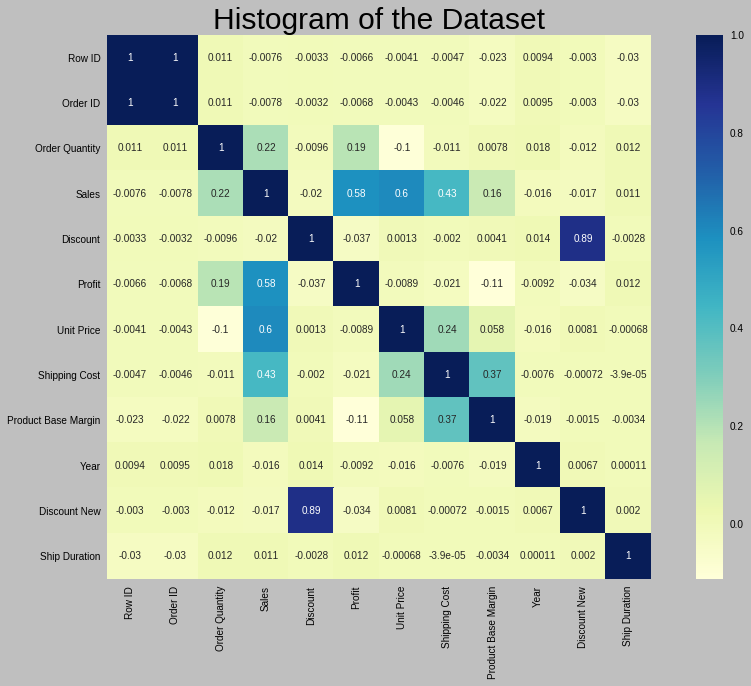

In [31]:
plt.style.use('fast')

plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(df.corr(),annot=True,square=True,cmap="YlGnBu")
plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

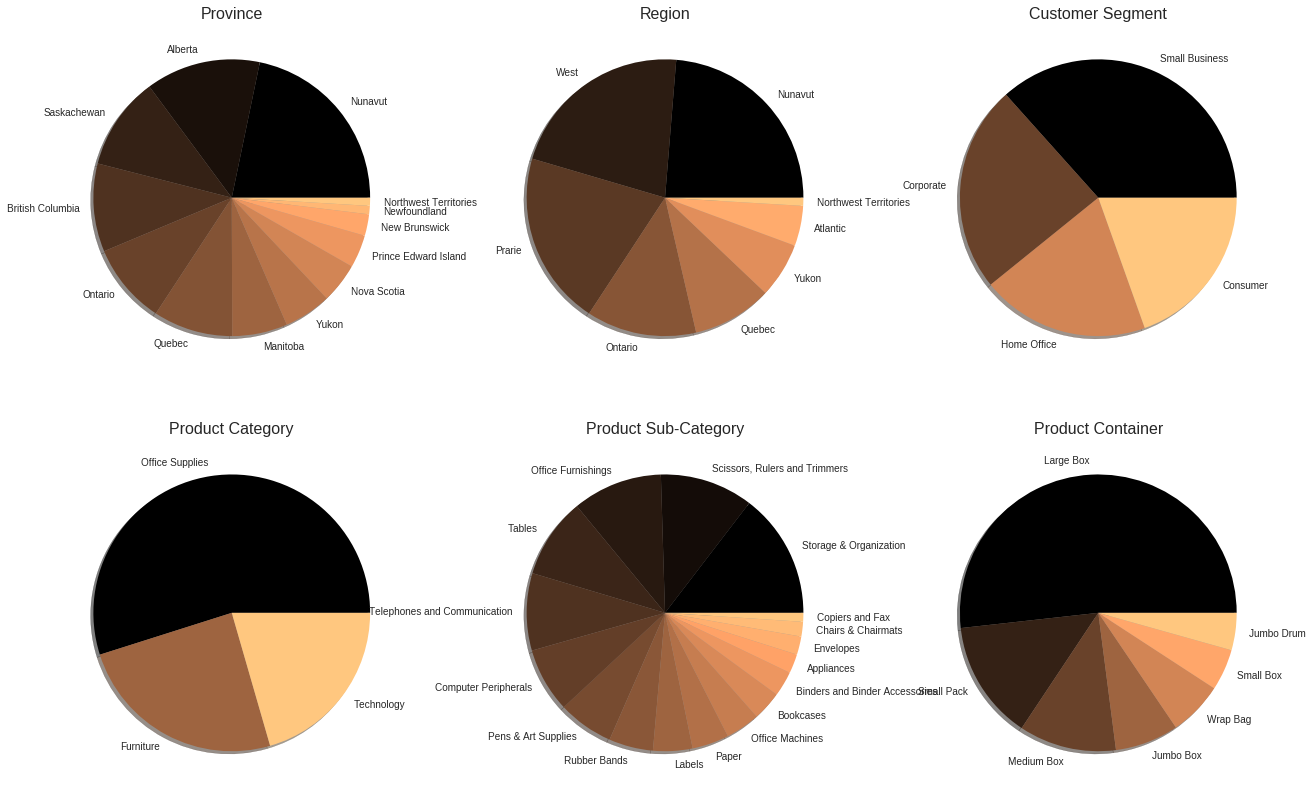

In [32]:
col = ['Province','Region','Customer Segment',
       'Product Category','Product Sub-Category',
       'Product Container','Ship Mode']

plt.style.use('seaborn')
fig,ax = plt.subplots(2,3,figsize=(22,14))

a = ax.shape[0]
b = ax.shape[1]

for i in range(a):
  for j in range(b):
    labels = list(df[col[i*b + j]].unique())
    colors = plt.cm.copper(np.linspace(0, 1, len(labels)))

    ax[i][j].pie(df[col[i*b + j]].value_counts(),shadow=True,colors=colors, labels=labels)
    ax[i][j].set_title(col[i*b + j],fontsize=16)